In [2]:
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import pandas as pd
import pickle

from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
from matplotlib.cm import gist_rainbow
from matplotlib.colors import Normalize, TwoSlopeNorm

from tqdm import tqdm

import os
import sys
sys.path.insert(1, '../')

from utils.viz import *
from utils.inference import load_inference_results
from utils.weighted_acc_rmse import unlog_tp, weighted_acc, weighted_rmse

cfs_dir = '/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative'
scratch_dir = '/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference'

configs = {
    'inf_l1_only_afno_wind': {
        'control': os.path.join(cfs_dir, 'inf_l1_only_afno_wind/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best.h5'),
        'ens100': os.path.join(cfs_dir, 'inf_l1_only_afno_wind/inference_ensemble/ens100/rollout_ckpt_best_level0.1.h5'),
    },
    'inf_l1_only_afno_wind_ppad_precip': {
        'control': os.path.join(cfs_dir, 'inf_l1_only_afno_wind_ppad_precip/inference_ensemble/control/rollout_ckpt_best.h5'),
        # 'ens100': os.path.join(cfs_dir, 'inf_l1_only_afno_wind_ppad_precip/inference_ensemble/ens100/rollout_ckpt_best_level0.1.h5'),
    },
    'inf_gan_decay_best_acc': {
        'control': os.path.join(scratch_dir, 'inf_gan_decay/inference_ensemble_viz/control/combined/rollout_ckpt_best.h5'),
        'ens100': os.path.join(scratch_dir, 'inf_gan_decay/inference_ensemble/ens100/combined/rollout_ckpt_best_level0.0.h5'),
    },
    'inf_gan_decay_best_bll': {
        'control': os.path.join(cfs_dir, 'inf_gan_decay/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best_binned_log_l1.h5'),
        'ens100': os.path.join(cfs_dir, 'inf_gan_decay/inference_ensemble/ens100/rollout_ckpt_best_binned_log_l1_level0.0.h5'),
        # 'ens100': os.path.join(scratch_dir, 'inf_gan_decay/inference_ensemble/ens100/best_bll/combined/rollout_ckpt_best_binned_log_l1_level0.0.h5'),
    },
    # 'inf_gan_ppad_precip': {
    #     'control': os.path.join(scratch_dir, 'inf_gan_ppad_precip/inference_ensemble/control/combined/rollout_ckpt_best_binned_log_l1.h5'),
    # },
    'afno': {
        'control': os.path.join(cfs_dir, 'afno/inference_ensemble/control/ens_autoregressive_predictions_spectra_control_tp.h5'),
        'ens100': os.path.join(cfs_dir, 'afno/inference_ensemble/ens100/ens_autoregressive_predictions_spectra_0.1_100ens_tp.h5'),
    }
}
        
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
inf_results = load_inference_results(configs, root_dir=scratch_dir)
inf_results.keys()

dict_keys(['inf_l1_only_afno_wind', 'inf_l1_only_afno_wind_ppad_precip', 'inf_gan_decay_best_acc', 'inf_gan_decay_best_bll', 'afno'])

In [3]:
inf_results['afno']['control'].filename

'/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/afno/inference_ensemble/control/ens_autoregressive_predictions_spectra_control_tp.h5'

In [4]:
inf_results['inf_l1_only_afno_wind']['control'].keys()

dict_keys(['acc', 'binned_log_l1', 'ics', 'pred_hists', 'rmse', 'seq_pred_tp', 'seq_real_tp', 'tar_hists', 'tqe'])

In [5]:
inf_results['inf_l1_only_afno_wind']['control']['seq_pred_tp']

In [6]:
type(inf_results['inf_l1_only_afno_wind']['control']['acc'])

numpy.ndarray

In [7]:
inf_results['inf_l1_only_afno_wind']['control']['acc'].shape

(178, 41, 1)

In [8]:
inf_results['afno']['control'].keys()

dict_keys(['acc', 'corr_amp', 'corr_amp_by_freq', 'corr_phase', 'corr_phase_by_freq', 'err_amp_by_freq', 'fcl', 'fcl_by_freq', 'ffl', 'ffl_by_freq', 'pred_amp_by_freq', 'rmse', 'rmse_amp', 'rmse_amp_by_freq', 'rmse_phase', 'rmse_phase_by_freq', 'tar_amp_by_freq', 'tqe', 'wf_corr_amp', 'wf_corr_amp_by_freq', 'wf_corr_phase', 'wf_corr_phase_by_freq', 'wf_fcl', 'wf_fcl_by_freq', 'wf_ffl', 'wf_ffl_by_freq', 'wf_rmse_amp', 'wf_rmse_amp_by_freq', 'wf_rmse_phase', 'wf_rmse_phase_by_freq', 'wfl_corr_amp', 'wfl_corr_amp_by_freq', 'wfl_corr_phase', 'wfl_corr_phase_by_freq', 'wfl_fcl', 'wfl_fcl_by_freq', 'wfl_ffl', 'wfl_ffl_by_freq', 'wfl_rmse_amp', 'wfl_rmse_amp_by_freq', 'wfl_rmse_phase', 'wfl_rmse_phase_by_freq', 'wl_corr_amp', 'wl_corr_amp_by_freq', 'wl_corr_phase', 'wl_corr_phase_by_freq', 'wl_fcl', 'wl_fcl_by_freq', 'wl_ffl', 'wl_ffl_by_freq', 'wl_rmse_amp', 'wl_rmse_amp_by_freq', 'wl_rmse_phase', 'wl_rmse_phase_by_freq'])

In [9]:
inf_results['afno']['ens100']['acc'].shape

(178, 41, 1)

In [10]:
inf_results['inf_l1_only_afno_wind']['control']['ics'].ravel()

array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.,  256.,  264.,  272.,  280.,
        288.,  296.,  304.,  312.,  320.,  328.,  336.,  344.,  352.,
        360.,  368.,  376.,  384.,  392.,  400.,  408.,  416.,  424.,
        432.,  440.,  448.,  456.,  464.,  472.,  480.,  488.,  496.,
        504.,  512.,  520.,  528.,  536.,  544.,  552.,  560.,  568.,
        576.,  584.,  592.,  600.,  608.,  616.,  624.,  632.,  640.,
        648.,  656.,  664.,  672.,  680.,  688.,  696.,  704.,  712.,
        720.,  728.,  736.,  744.,  752.,  760.,  768.,  776.,  784.,
        792.,  800.,  808.,  816.,  824.,  832.,  840.,  848.,  856.,
        864.,  872.,  880.,  888.,  896.,  904.,  912.,  920.,  928.,
        936.,  944.,  952.,  960.,  968.,  976.,  984.,  992., 1000.,
       1008., 1016.,

In [11]:
for config, inner_dict in inf_results.items():
    print(config)
    for exper, dset in inner_dict.items():
        msg = '--- ' + exper
        n_ics = 0
        if config != 'afno':
            n_ics = len(dset["ics"][:])
            print(f"{msg}\n{dset.filename}\nnum. ics: {n_ics}/178\n")
    print()

inf_l1_only_afno_wind
--- control
/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/inf_l1_only_afno_wind/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best.h5
num. ics: 178/178

--- ens100
/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/inf_l1_only_afno_wind/inference_ensemble/ens100/rollout_ckpt_best_level0.1.h5
num. ics: 178/178


inf_l1_only_afno_wind_ppad_precip
--- control
/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/inf_l1_only_afno_wind_ppad_precip/inference_ensemble/control/rollout_ckpt_best.h5
num. ics: 178/178


inf_gan_decay_best_acc
--- control
/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference/inf_gan_decay/inference_ensemble_viz/control/combined/rollout_ckpt_best.h5
num. ics: 178/178

--- ens100
/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference/inf_gan_decay/inference_ensemble/ens100/combined/rollout_ckpt_best_level0.0.h5
num. ics: 178/178


inf_gan_decay_

# Rollouts

## Control

No ensembling of model outputs.

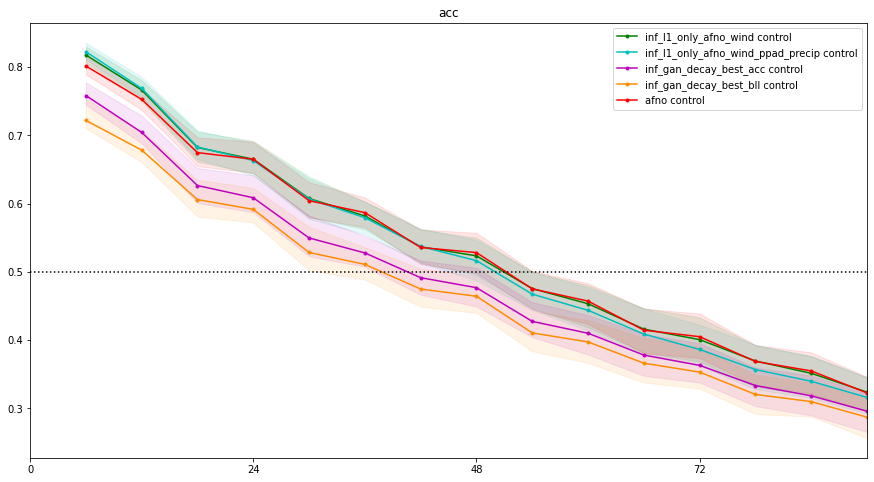

In [12]:
fc_acc = viz_inference(inf_results)
plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
fc_acc.show()

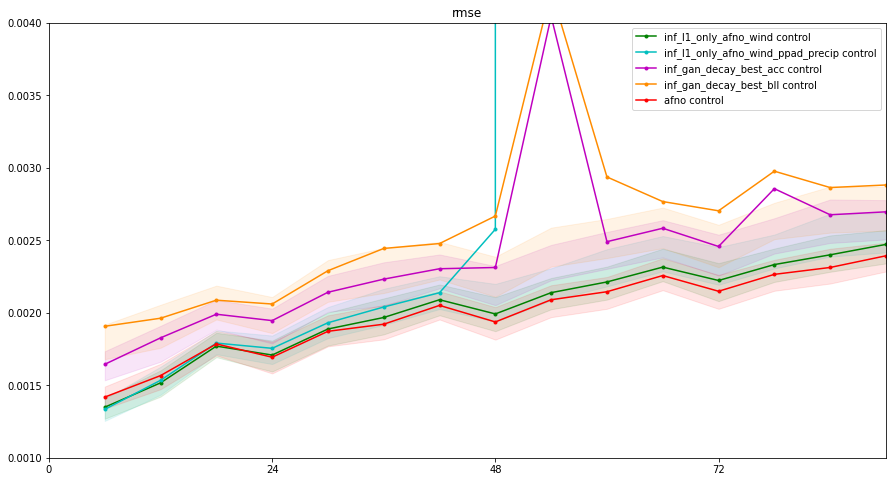

In [13]:
fc_bll = viz_inference(inf_results, metric_name='rmse')
plt.ylim(0.001, 0.004)
fc_bll.show()

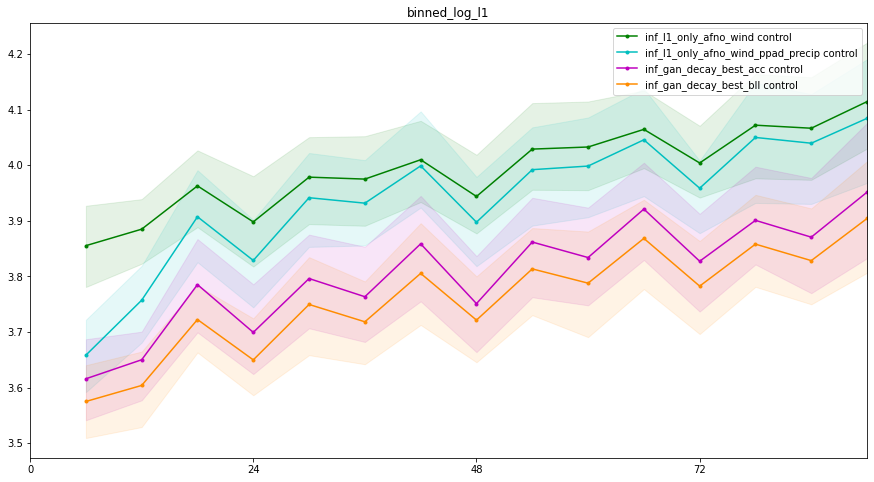

In [14]:
fc_bll = viz_inference(inf_results, metric_name='binned_log_l1')
fc_bll.show()

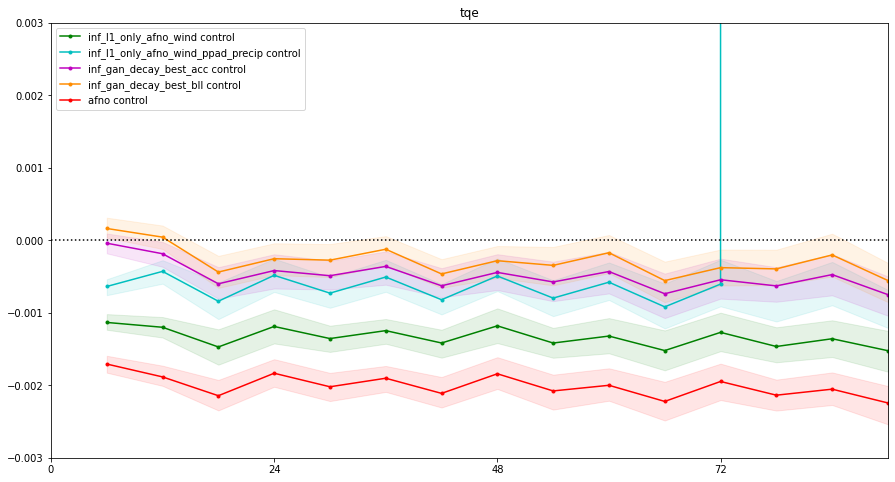

In [15]:
fc_tqe = viz_inference(inf_results, metric_name='tqe')
plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
plt.ylim(-0.003, 0.003)
fc_tqe.show()

## Ensemble

Outputs are 100-member ensemble average.

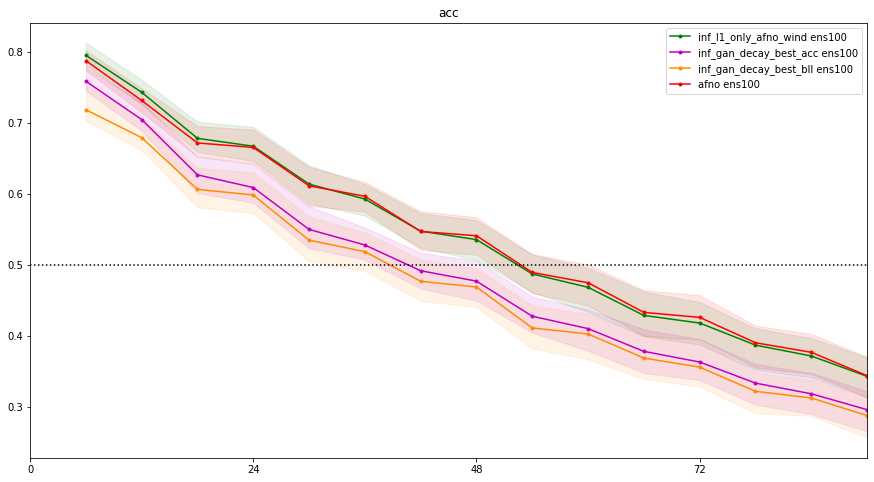

In [20]:
fe_acc = viz_inference(inf_results, ['ens100'])
plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
fe_acc.show()

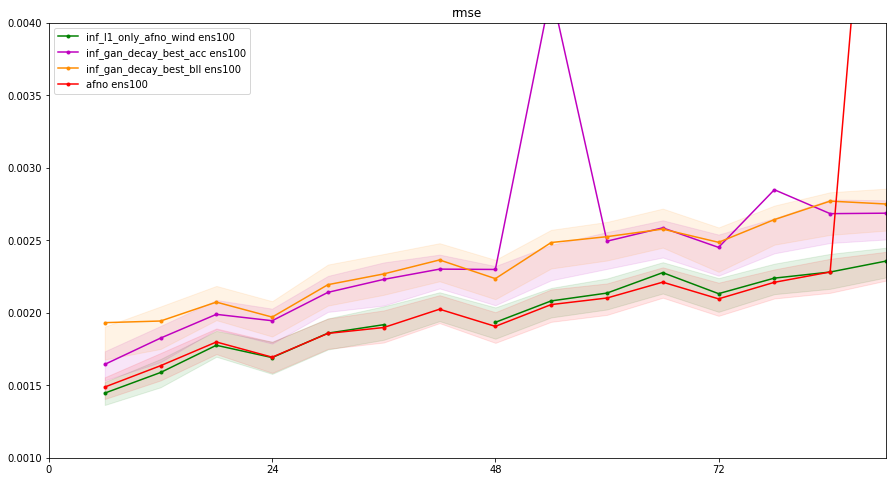

In [21]:
fe_rmse = viz_inference(inf_results, ['ens100'], metric_name='rmse')
plt.ylim(0.001, 0.004)
fe_rmse.show()

In [22]:
# fe_bll = viz_inference(inf_results, ['ens100'], metric_name='binned_log_l1')
# fe_bll.show()

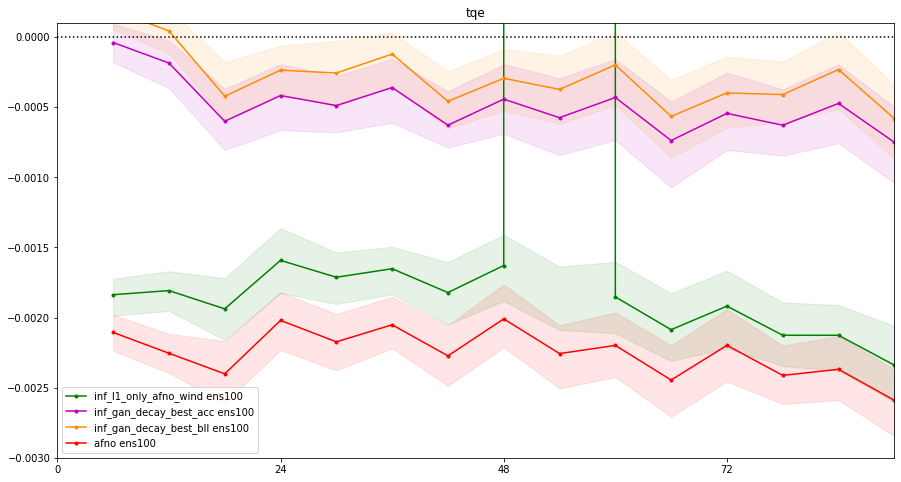

In [23]:
fe_tqe = viz_inference(inf_results, ['ens100'], metric_name='tqe')
plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
plt.ylim(-0.003, 0.0001)
fe_tqe.show()

In [20]:
metrics = ['acc', 'rmse', 'binned_log_l1', 'tqe']

ens_nnan_dict = {}

for config, inner_dict in inf_results.items():
    if 'ens100' in inner_dict.keys() and config != 'afno':
        dsets = inner_dict['ens100']
        df = pd.DataFrame(columns=np.arange(41)*6, index=metrics).rename_axis('hrs ahead', axis=1)
        for metric in metrics:
            num_nan = np.isnan(dsets[metric][:]).sum(axis=0).ravel()
            df.loc[metric] = pd.Series(num_nan, index=np.arange(41)*6)
        ens_nnan_dict[config] = df
        
ens_nnan = pd.concat(ens_nnan_dict.values(), keys=ens_nnan_dict.keys())

In [21]:
ens_nnan.iloc[:, :30]

hrs ahead                               0   6   12  18  24  30  36  42  48   \
inf_l1_only_afno_wind     acc             0   0   0   0   0   0   0   1   1   
                          rmse            0   0   0   0   0   0   0   0   1   
                          binned_log_l1   0   0   0   0   0   0   0   0   0   
                          tqe             0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_acc    acc             0   0   0   0   0   0   0   0   0   
                          rmse            0   0   0   0   0   0   0   0   0   
                          binned_log_l1   0   0   0   0   0   0   0   0   0   
                          tqe             0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_precip acc             0   0   0   0   0   0   0   0   0   
                          rmse            0   0   0   0   0   0   0   0   0   
                          binned_log_l1   0   0   0   0   0   0   0   0   0   
                          tqe             0   0   0   0   0   0   0   0   0   

hrs ahead                               54   ... 120 126 132 138 144 150 156  \
inf_l1_only_afno_wind     acc             1  ...   2   3   4   4   4   7   9   
                          rmse            1  ...   2   2   3   3   3   5   7   
                          binned_log_l1   0  ...   0   0   0   0   0   0   0   
                          tqe             0  ...   2   2   2   3   3   3   4   
inf_gan_decay_best_acc    acc             0  ...   0   0   0   0   0   0   0   
                          rmse            0  ...   0   0   0   0   0   0   0   
                          binned_log_l1   0  ...   0   0   0   0   0   0   0   
                          tqe             0  ...   0   0   0   0   0   0   0   
inf_gan_decay_best_precip acc             0  ...   0   0   0   0   0   0   0   
                          rmse            0  ...   0   0   0   0   0   0   0   
                          binned_log_l1   0  ...   0   0   0   0   0   0   0   
                          tqe             0  ...   0   0   0   0   0   0   0   

hrs ahead                               162 168 174  
inf_l1_only_afno_wind     acc            18  34  51  
                          rmse           13  26  40  
                          binned_log_l1   0   0   0  
                          tqe             4   5   5  
inf_gan_decay_best_acc    acc             0   1   2  
                          rmse            0   1   1  
                          binned_log_l1   0   0   0  
                          tqe             0   0   0  
inf_gan_decay_best_precip acc             0   1   1  
                          rmse            0   1   1  
                          binned_log_l1   0   0   0  
                          tqe             0   0   0  

[12 rows x 30 columns]

In [22]:
ens_nnan.iloc[:, -20:]

hrs ahead                               126 132 138 144 150 156 162 168 174  \
inf_l1_only_afno_wind     acc             3   4   4   4   7   9  18  34  51   
                          rmse            2   3   3   3   5   7  13  26  40   
                          binned_log_l1   0   0   0   0   0   0   0   0   0   
                          tqe             2   2   3   3   3   4   4   5   5   
inf_gan_decay_best_acc    acc             0   0   0   0   0   0   0   1   2   
                          rmse            0   0   0   0   0   0   0   1   1   
                          binned_log_l1   0   0   0   0   0   0   0   0   0   
                          tqe             0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_precip acc             0   0   0   0   0   0   0   1   1   
                          rmse            0   0   0   0   0   0   0   1   1   
                          binned_log_l1   0   0   0   0   0   0   0   0   0   
                          tqe             0   0   0   0   0   0   0   0   0   

hrs ahead                               180 186 192  198  204  210  216  222  \
inf_l1_only_afno_wind     acc            63  81  99  111  119  133  145  158   
                          rmse           47  66  83   98  109  123  139  154   
                          binned_log_l1   0   0   0    0    0    0    0    0   
                          tqe            10  26  39   47   60   77   94  106   
inf_gan_decay_best_acc    acc             3   4   6   13   23   41   51   64   
                          rmse            3   4   6   12   23   40   51   64   
                          binned_log_l1   0   0   0    0    0    0    0    0   
                          tqe             0   0   0    0    0    1    2    4   
inf_gan_decay_best_precip acc             2   2   4    9   16   25   31   38   
                          rmse            2   2   4    9   15   24   30   38   
                          binned_log_l1   0   0   0    0    0    0    0    0   
                          tqe             0   0   0    1    1    1    0    2   

hrs ahead                                228  234  240  
inf_l1_only_afno_wind     acc            166  175  176  
                          rmse           162  172  175  
                          binned_log_l1    0    0    0  
                          tqe            119  135  147  
inf_gan_decay_best_acc    acc             71   81   97  
                          rmse            71   78   96  
                          binned_log_l1    0    0    0  
                          tqe             11   14   23  
inf_gan_decay_best_precip acc             43   48   58  
                          rmse            43   46   57  
                          binned_log_l1    0    0    0  
                          tqe              5   10   13

In [23]:
print(f'inf_l1_only_afno_wind, t={9*6}\n')

print(' tqe')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['tqe'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['tqe'][26, 9].item()}\n")

print(' binned_log_l1')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['binned_log_l1'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['binned_log_l1'][26, 9].item()}\n")

print(' acc')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['acc'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['acc'][26, 9].item()}\n")

print(' rmse')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['rmse'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['rmse'][26, 9].item()}")

inf_l1_only_afno_wind, t=54

 tqe
 -- ics 0 to 200 (mean): -0.0018
 -- ic 208: 124222584.0

 binned_log_l1
 -- ics 0 to 200 (mean): 4.1587
 -- ic 208: 4.3495988845825195

 acc
 -- ics 0 to 200 (mean): 0.5023
 -- ic 208: nan

 rmse
 -- ics 0 to 200 (mean): 0.0021
 -- ic 208: nan


## Compare ensemble to control

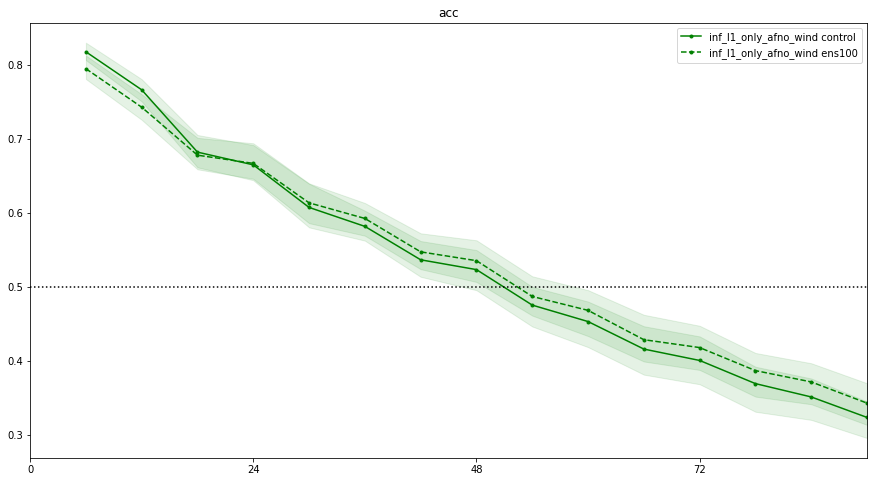

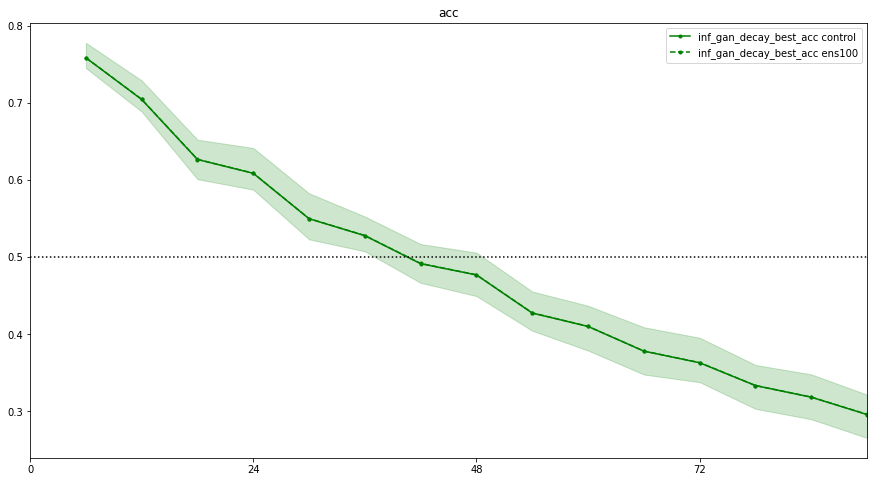

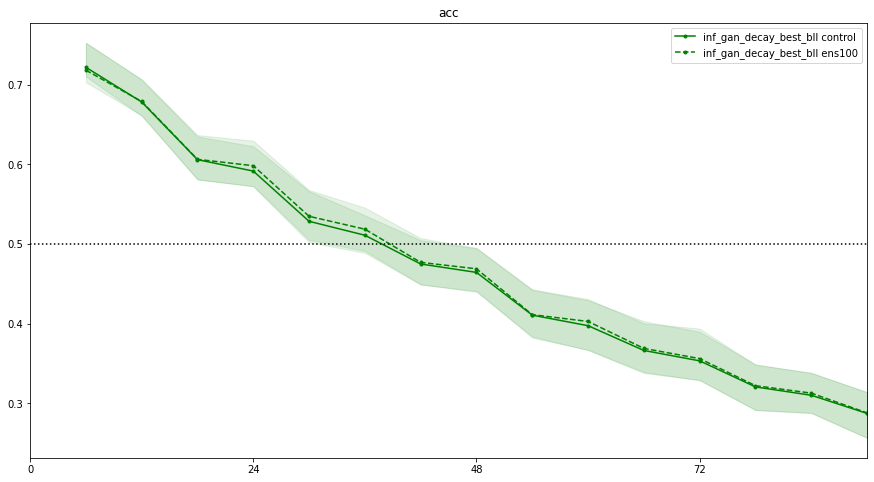

In [28]:
keys = ['inf_l1_only_afno_wind', 'inf_gan_decay_best_acc', 'inf_gan_decay_best_bll']
for key in keys:
    f = viz_inference({key: inf_results[key]}, ['control', 'ens100'], metric_name='acc')
    plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
    f.show()

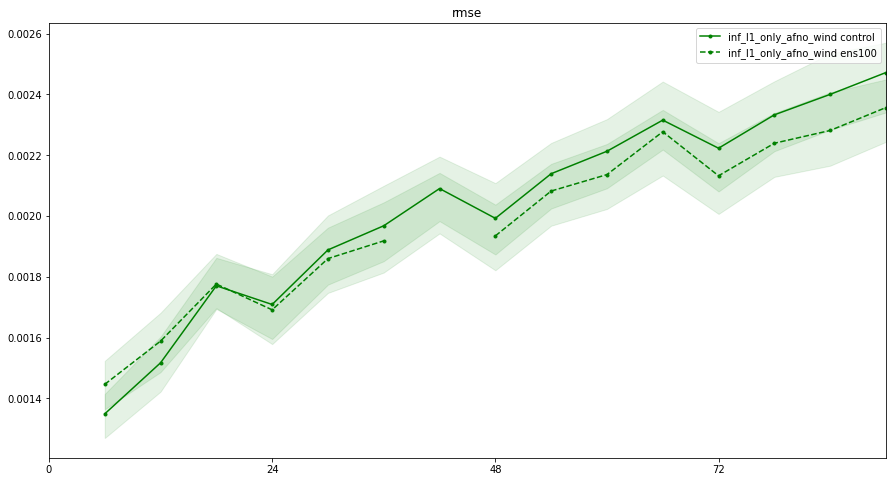

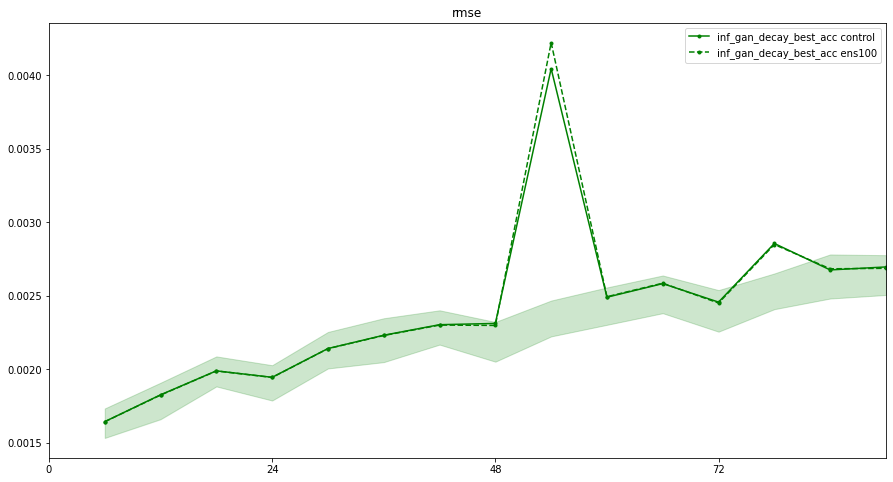

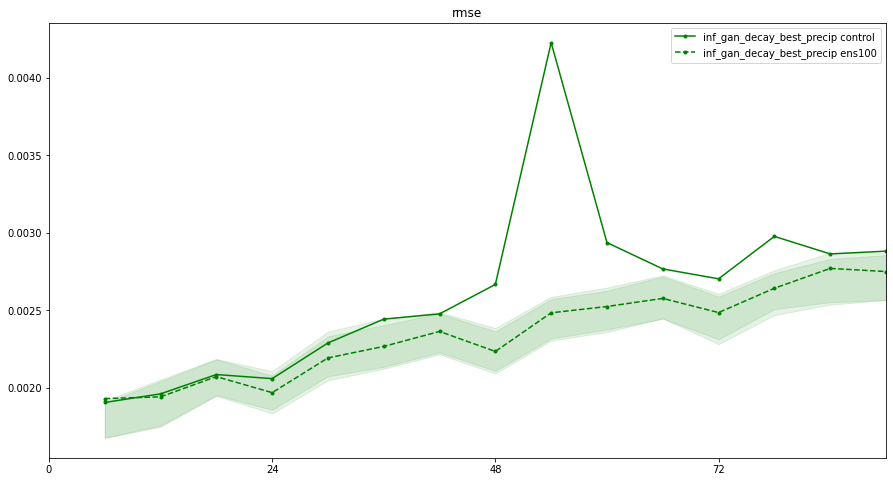

In [49]:
for key in keys:
    f = viz_inference({key: inf_results[key]}, ['control', 'ens100'], metric_name='rmse')
    f.show()

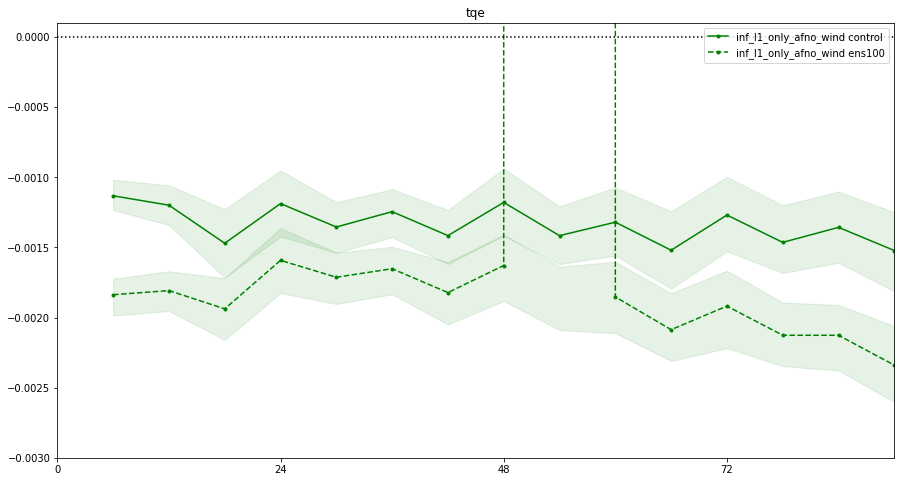

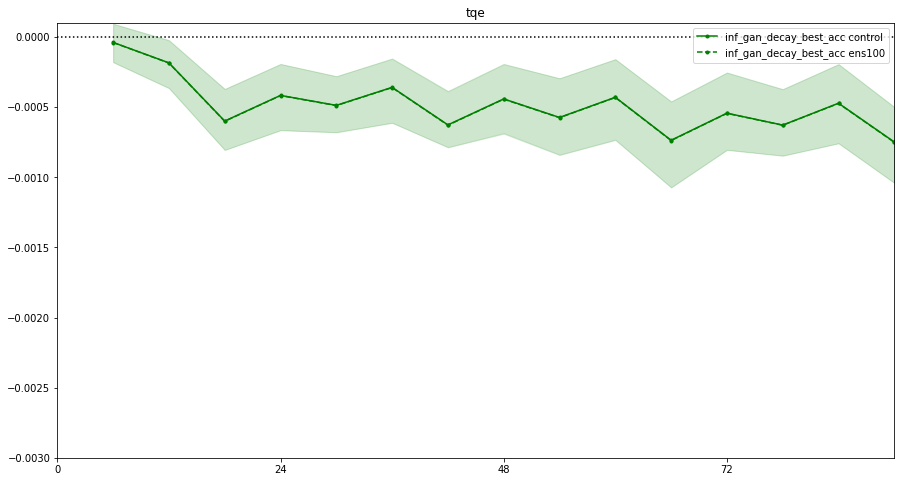

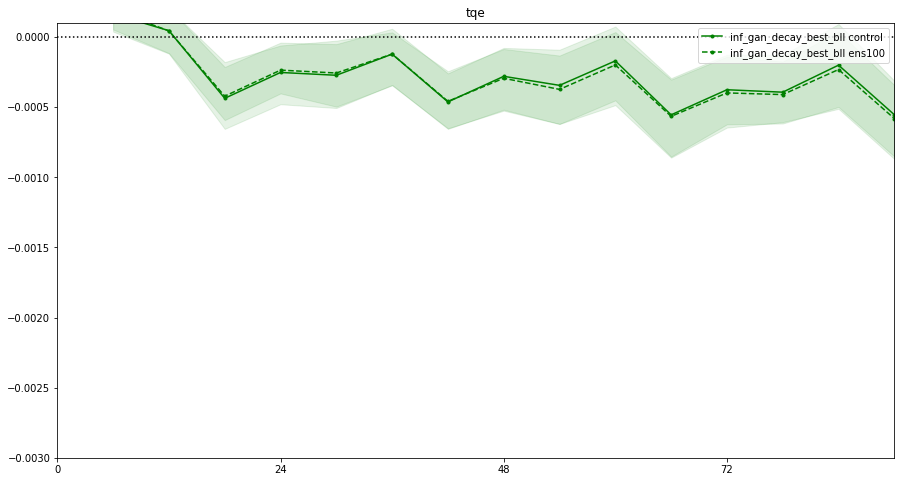

In [27]:
for key in keys:
    f = viz_inference({key: inf_results[key]}, ['control', 'ens100'], metric_name='tqe')
    plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
    plt.ylim(-0.003, 0.0001)
    f.show()

In [45]:
# does ensembling help ACC stability?

# metrics = ['acc']
# keys = ['inf_gan_decay_best_acc']

# acc_nnan_dict = {}

# for config, inner_dict in {key: inf_results[key]}.items():
#     if 'ens100' in inner_dict.keys() and config != 'afno':
#         dsets = inner_dict['ens100']
#         df = pd.DataFrame(columns=np.arange(41)*6, index=metrics).rename_axis('hrs ahead', axis=1)
#         for metric in metrics:
#             num_nan = np.isnan(dsets[metric][:]).sum(axis=0).ravel()
#             df.loc[metric] = pd.Series(num_nan, index=np.arange(41)*6)
#         ens_nnan_dict[config] = df
        
# ens_nnan = pd.concat(ens_nnan_dict.values(), keys=ens_nnan_dict.keys())

array([ 0.0000000e+00,  6.8061338e-05, -2.3504756e-04, -3.6259560e-04,
       -4.8774431e-04, -7.9538982e-04, -6.2304607e-04, -7.0287380e-04,
       -5.1448133e-04, -8.1555586e-04, -9.0923760e-04, -1.5944839e-03,
       -6.5741816e-04, -9.5623454e-06,  3.6236204e-05, -1.1949231e-04,
       -6.6357356e-04, -9.9543203e-04, -6.5968733e-04, -1.0308083e-03,
       -5.8609544e-04, -1.0016591e-03, -9.6743106e-04, -1.1963538e-03,
       -8.3283905e-04, -9.3943655e-04, -9.7671279e-04, -1.5073129e-03,
       -1.1188737e-03, -1.7770430e-03, -1.8873818e-03, -2.6397179e-03,
       -1.9227337e-03, -1.1128295e-03, -1.1345354e-03, -1.3266485e-03,
       -8.7750820e-04, -1.1431844e-03, -1.6230480e-03, -5.3368509e-04,
        1.6883443e+02], dtype=float32)

# Outputs

## Gaussian blur experiment

In [2]:
gan_f = h5py.File(os.path.join(cfs_dir, 'inf_gan_decay/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best_binned_log_l1.h5'), 'r')
gan_blur_f = h5py.File('/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference/inf_gan_decay/inference_gauss_blur/best_dll/combined/gauss_blur.h5', 'r')
gan_blur_f.keys()

<KeysViewHDF5 ['acc', 'ics', 'rmse', 'sigmas', 'tqe']>

In [3]:
# ics, n_sigmas, n_dt, w, h
gan_blur_f['acc'].shape

(178, 10, 41)

In [4]:
gan_f['acc'].shape

(178, 41, 1)

In [5]:
sigmas = np.unique(gan_blur_f['sigmas'][:])

In [6]:
ifs_f = h5py.File('/global/cfs/cdirs/m4134/pscratch/precip/tigge/total_precipitation/2018.h5', 'r')
ifs_f['tp'].shape

(730, 20, 720, 1440)

In [8]:
baseline_mean.shape

(3,)

In [3]:
fcstep = 3

vmin, vmax = 0., 5.
cmap = gist_rainbow.reversed()
norm = Normalize(vmin=vmin, vmax=vmax)

for metric in ['acc', 'rmse', 'tqe']:

    t = (np.arange(gan_blur_f[metric].shape[-1]-1) + 1) *6
    
    baseline_mean = np.mean(gan_f[metric][:, 1:, 0], axis=0)
    baseline_stderr = np.std(gan_f[metric][:, 1:, 0], axis=0) / np.sqrt(gan_f[metric].shape[0])
    
    fs=15

    plt.figure(figsize=(10,5))
    ax = plt.gca()

    ax.plot(t, baseline_mean, 'r-.', label=r'L1 + adversarial (original)', lw=2)
    ax.fill_between(t, baseline_mean+baseline_stderr, baseline_mean-baseline_stderr, alpha=0.1, color='r')
    
    for i in range(1, gan_blur_f[metric].shape[1]):
        
        sigma = sigmas[i]
    
        metric_mean = np.mean(gan_blur_f[metric][:, i, 1:], axis=0)
        metric_stderr = np.std(gan_blur_f[metric][:, i, 1:], axis=0) / np.sqrt(gan_blur_f[metric].shape[0])

        ax.plot(t, metric_mean, linestyle='-', label=f'L1 + adversarial ($\sigma = {sigmas[i]}$)', lw=2, color=cmap(norm(sigma)))
        ax.fill_between(t, metric_mean+metric_stderr, metric_mean-metric_stderr, alpha=0.1, color=cmap(norm(sigma)))

    ax.set_xlabel('Forecast time (hours)', fontsize=fs)
    ax.set_ylabel(metric, fontsize=fs-2)
    ax.legend(fontsize=fs-2)
    plt.tight_layout()
    # plt.savefig(outdir+'gaussblur_acc.pdf')

    plt.show()

NameError: name 'gan_blur_f' is not defined

In [17]:
def top_rel_quant_err(pred, target):
    qs = 100
    qlim = 3
    qcut = 0.1
    qtile = 1. - np.logspace(-qlim, -qcut, num=qs)
    P_tar = np.quantile(target.ravel(), q=qtile, axis=-1)
    P_pred = np.quantile(pred.ravel(), q=qtile, axis=-1)
    diff = (P_pred - P_tar)
    return np.mean([x / y if y != 0 else x for x, y in zip(diff, P_tar)], axis=0)

def top_quant_err(pred, target):
    qs = 100
    qlim = 3
    qcut = 0.1
    qtile = 1. - np.logspace(-qlim, -qcut, num=qs)
    P_tar = np.quantile(target.ravel(), q=qtile, axis=-1)
    P_pred = np.quantile(pred.ravel(), q=qtile, axis=-1)
    return np.mean(P_pred - P_tar, axis=0)

tp_tm = np.load('/global/cfs/cdirs/m4134/pscratch/precip/total_precipitation/time_means.npy')[0]

def gaussian_filter_2d(a, sigma):
    gf = gaussian_filter1d(a, sigma, axis=-1, mode='wrap')
    gaussian_filter1d(gf, sigma, axis=-2, output=gf)
    return gf

In [18]:
# if True, run the main loop
RUN_LOOP = True

sigmax = 3.
sigby = 0.5

t_range = (1, 16)
n_ics = 48
total_ics = inf_results['inf_gan_decay_best_bll']['control']['seq_pred_tp'].shape[0]

metrics = {
    'acc': weighted_acc, 
    'rmse': weighted_rmse, 
    'tqe': top_quant_err, 
    'trqe': top_rel_quant_err,
}

configs_blur = {
    'inf_gan_decay_best_bll': {
        'DELETE_CACHE': False, # if True, start over
        'RUN_LOOP': True, # if False, just load cached results
    }
}

for config, loop_settings in tqdm(inf_results.items()):

    if RUN_LOOP and len(gauss_ics) < total_ics:
    
        gauss_results = {
            'sigma': [],
            'img': [],
            'ics': [],
            'metrics': {}
        }

        rng = np.random.default_rng()
        rand_ics = np.arange(total_ics)
        rand_ics = rand_ics[~np.in1d(rand_ics, gauss_ics)]

        rand_ics = rng.choice(rand_ics, size=min(n_ics, len(rand_ics)), replace=False)
        rand_ics.sort()
        gauss_ics = np.append(gauss_ics, rand_ics).astype('int')

        out_file = './gauss_blur_{config}.pkl'
        
        DELETE_CACHE = loop_settings['DELETE_CACHE']
        
        if DELETE_CACHE and os.path.isfile(out_file):
            os.remove(out_file)
        elif os.path.isfile(out_file):
            with open(out_file, 'rb') as f:
                gauss_ics, gauss_results = pickle.load(f)
    
        metric_dict = gauss_results['metrics']
    
        for metric in metrics.keys():
            metric_dict.setdefault(metric, [])
            metric_dict.append([])

        pred_ics = inf_results[config]['control']['seq_pred_tp']
        tar_ics = inf_results[config]['control']['seq_real_tp']

        sigmas = np.arange(0., sigmax, sigby)

        for sigma in [sigma]:

            if sigma not in gauss_results['sigma']:
                gauss_results['sigma'].append(sigma)

            exper_dict['img'].append([])
            for metric in metrics.keys():
                exper_dict[metric].append([])

            # img_ = exper_dict['img'][-1]
            # acc_ = exper_dict['acc'][-1]
            # rmse_ = exper_dict['rmse'][-1]
            # tqe_ = exper_dict['tqe'][-1]
            # trqe_ = exper_dict['trqe'][-1]

            for ic in rand_ics:

                exper_dict['img'][-1].append([])
                for metric in metrics.keys():
                    exper_dict[metric][-1].append([])

                for t in range(t_range[0], t_range[1]):

                    if sigma == 0.:
                        blurred = pred_ics[ic, t, 0]
                    else:
                        blurred = gaussian_filter_2d(pred_ics[ic, t, 0], sigma)
                    if t == t_range[0]:
                        exper_dict['img'][-1].append(blurred)

                    tar_unlog = unlog_tp(tar_ics[ic, t, 0])
                    blurred_unlog = unlog_tp(blurred)

                    for metric, metric_fn in metrics.items():
                        metric_ = exper_dict[metric][-1][-1]
                        if metric == 'acc':
                            metric_.append(metric_fn(blurred_unlog - tp_tm, tar_unlog - tp_tm))
                        else:
                            metric_.append(metric_fn(blurred_unlog, tar_unlog))

            for key, value in exper_dict.items():
                exper_dict[key] = np.array(exper_dict[key])

            if exper_dict_ is None:
                inner_gauss[exper] = exper_dict
            else:
                for key, val in exper_dict_.items():
                    if key == 'sigma':
                        exper_dict_[key] = sigmas
                    else:
                        axis = 0 if config == 'afno' else 1
                        exper_dict_[key] = np.concatenate((val, exper_dict[key]), axis=axis)
    
    with open(out_file, 'wb') as f:
        pickle.dump((gauss_ics, gauss_results), f)
        
print(f"tsit: n_sigmas, n_ics, n_t = {gauss_results['inf_gan']['control']['acc'].shape}")
print(f"afno: n_ics, n_t = {gauss_results['afno']['control']['acc'].shape}")

tsit: n_sigmas, n_ics, n_t = (6, 40, 15)
afno: n_ics, n_t = (40, 15)


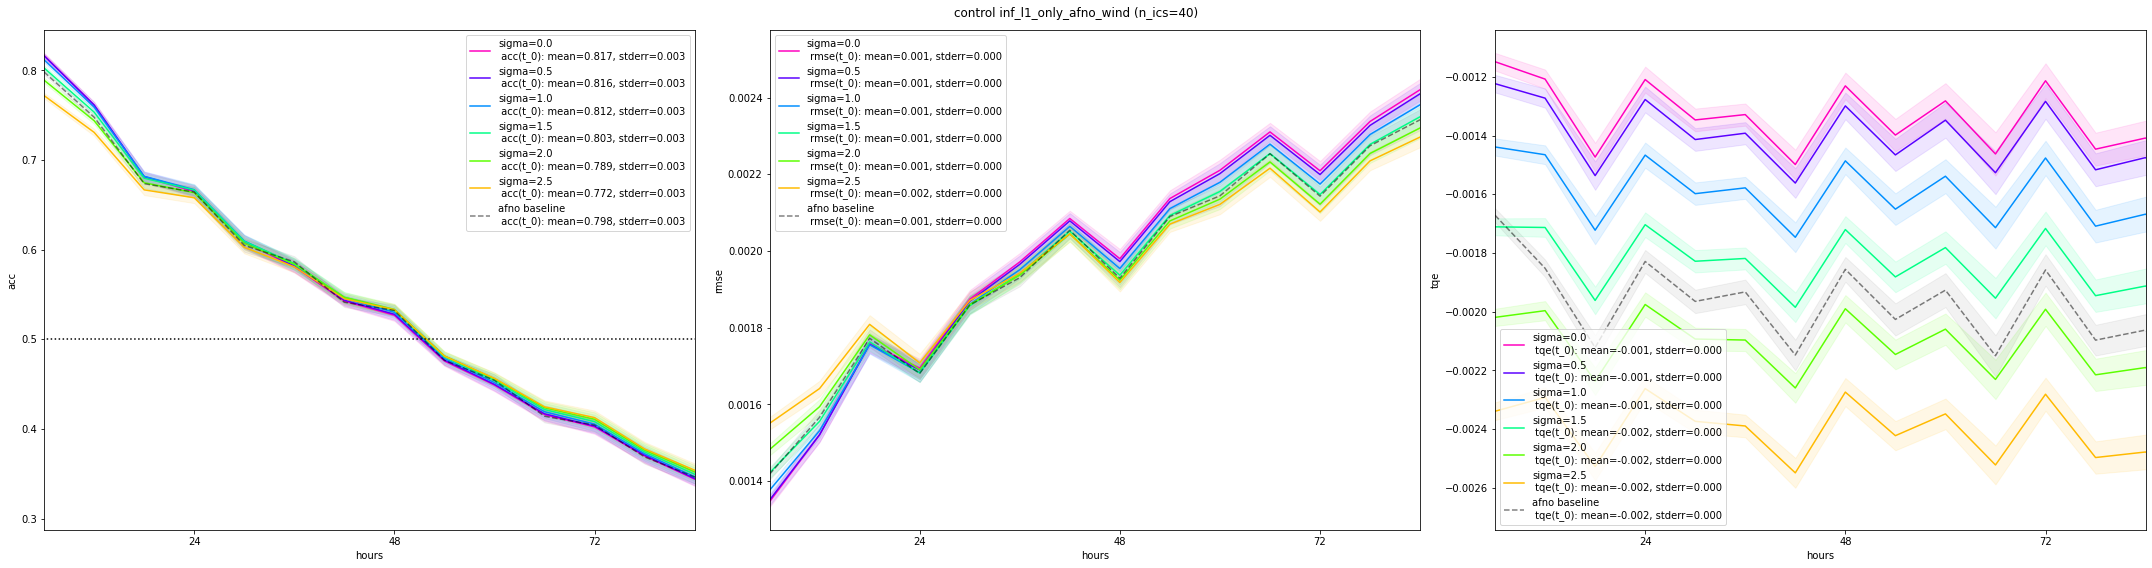

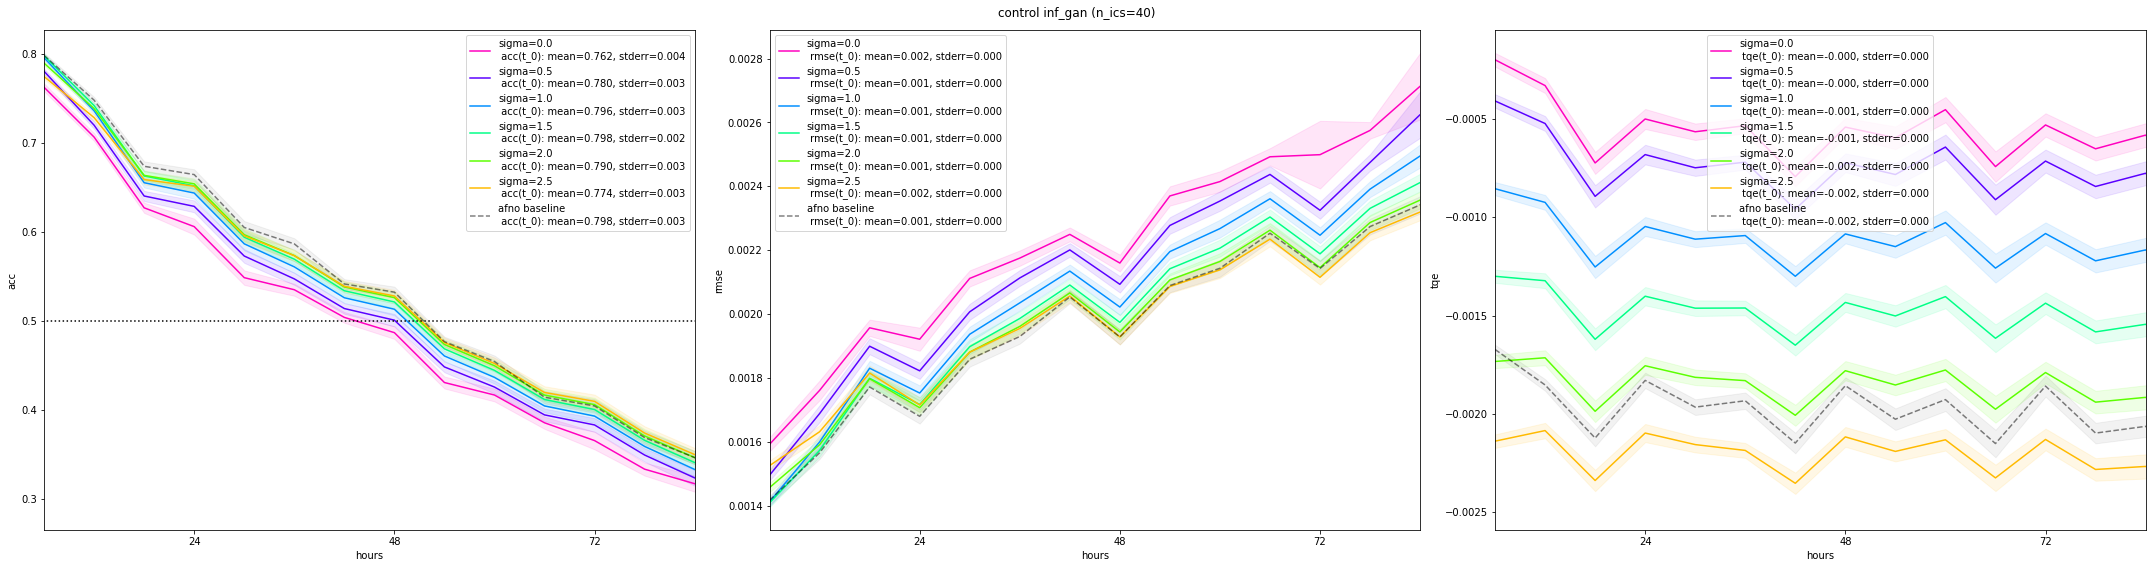

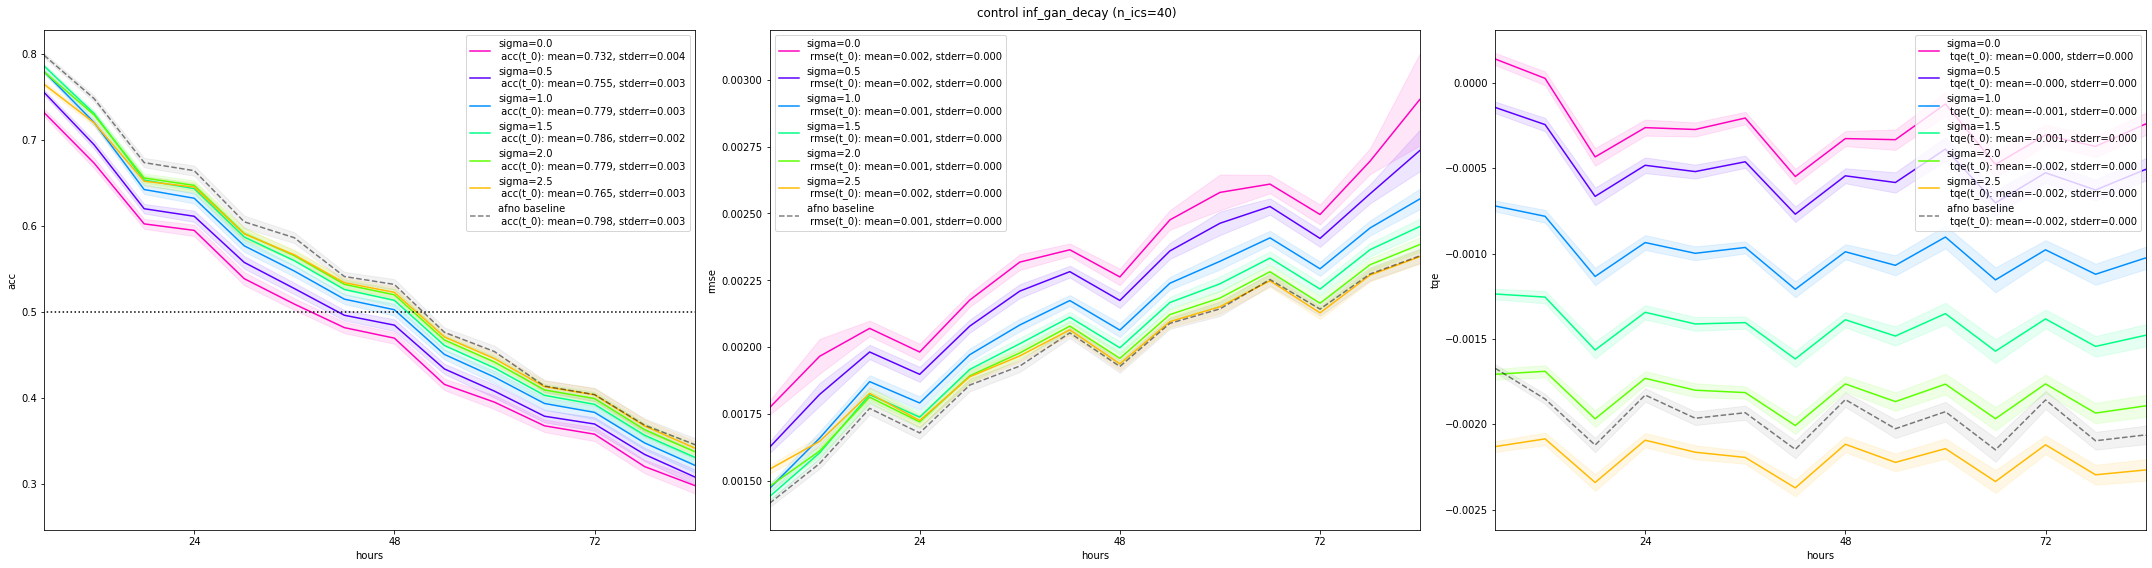

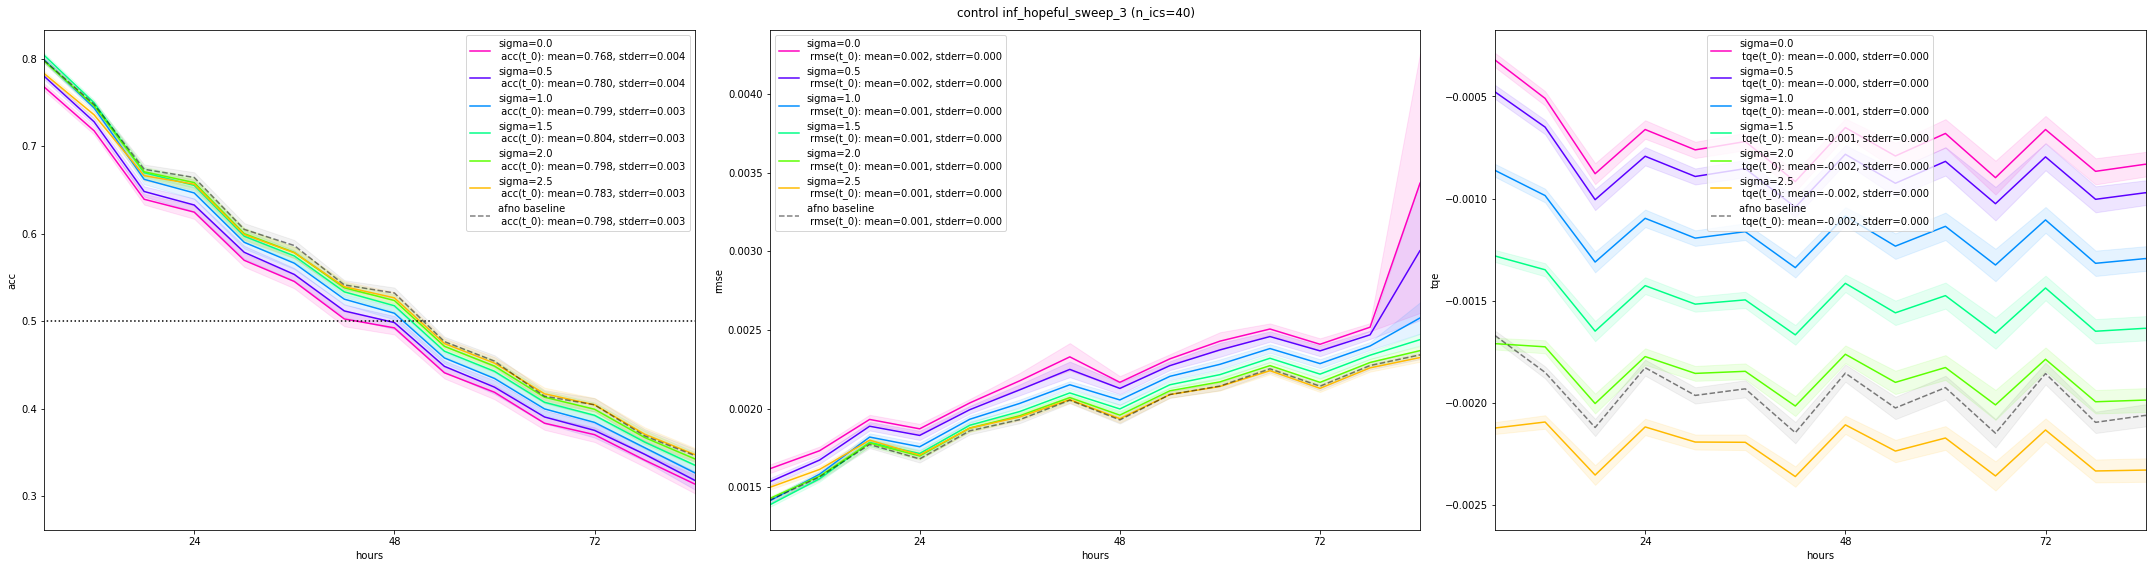

In [19]:
vmin, vmax = 0., 3.
cmap = gist_rainbow.reversed()
norm = Normalize(vmin=vmin, vmax=vmax)

for config, results in {c: r for c, r in gauss_results.items() if c != 'afno'}.items():
    
    for exper, inner_results in results.items():
    
        plt.figure(figsize=(30, 8))
        for idx, metric in enumerate(['acc', 'rmse', 'tqe']):
            plt.subplot(1, 3, idx + 1)

            for sidx, sigma in enumerate(inner_results['sigma']):
                metric_ = inner_results[metric][sidx].mean(axis=0)
                std_err = inner_results[metric][sidx].std(axis=0) / np.sqrt(inner_results[metric][sidx].shape[0])
                plt.plot(np.arange(1, len(metric_) + 1) * 6, metric_, color = cmap(norm(sigma)), 
                         label=f'sigma={sigma:.1f}\n {metric}(t_0): mean={metric_[0]:.3f}, stderr={std_err[0]:.3f}')
                plt.fill_between(np.arange(1, len(metric_) + 1) * 6, metric_ - std_err, metric_ + std_err, color=cmap(norm(sigma)), alpha=0.1)

            metric_ = gauss_results['afno'][exper][metric].mean(axis=0)
            std_err = gauss_results['afno'][exper][metric].std(axis=0) / np.sqrt(gauss_results['afno'][exper][metric].shape[0])
            plt.plot(np.arange(1, len(metric_) + 1) * 6, metric_, color = 'k', linestyle='--', 
                     label=f'afno baseline\n {metric}(t_0): mean={metric_[0]:.3f}, stderr={std_err[0]:.3f}', alpha=0.5)
            plt.fill_between(np.arange(1, len(metric_) + 1) * 6, metric_ - std_err, metric_ + std_err, color='k', alpha=0.05)

            plt.xlabel('hours')
            plt.ylabel(metric)
            plt.legend()

            if metric == 'acc':
                plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
            elif metric == 'trqe':
                plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
                
            plt.xlim(6, (len(metric_) - 1) * 6)
            plt.xticks([24, 48, 72])

        plt.suptitle(f'{exper} {config} (n_ics={len(gauss_ics)})')
        plt.tight_layout()
        plt.show()

## Plot guassian blur experiment

In [23]:
gauss_results['inf_gan_decay']['control'].keys()

dict_keys(['sigma', 'img', 'acc', 'rmse', 'tqe', 'trqe'])

In [26]:
gauss_results['inf_gan_decay']['control']['sigma']

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [25]:
gauss_results['inf_gan_decay']['control']['acc'].shape

(6, 40, 15)

In [39]:
outdir = '/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/plots/'

In [53]:
t = np.arange(gauss_results['inf_gan_decay']['control']['acc'].shape[-1])*6

mean_gan_orig = gauss_results['inf_gan_decay']['control']['acc'][0].mean(axis=0)
stderr_gan_orig = gauss_results['inf_gan_decay']['control']['acc'][0].std(axis=0) / np.sqrt(len(t))

mean_gan_blur = gauss_results['inf_gan_decay']['control']['acc'][3].mean(axis=0)
stderr_gan_blur = gauss_results['inf_gan_decay']['control']['acc'][3].std(axis=0) / np.sqrt(len(t))

mean_l1_orig = gauss_results['inf_l1_only_afno_wind']['control']['acc'][0].mean(axis=0)
stderr_l1_orig = gauss_results['inf_l1_only_afno_wind']['control']['acc'][0].std(axis=0) / np.sqrt(len(t))
# mean_ifs

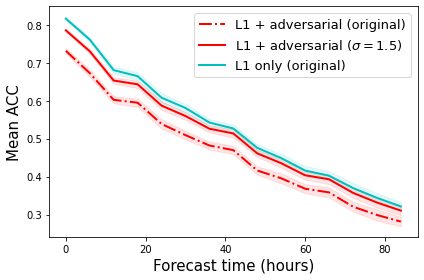

In [56]:
fs=15

plt.figure()
ax = plt.gca()

ax.plot(t, mean_gan_orig, 'r-.', label=r'L1 + adversarial (original)', lw=2)
ax.fill_between(t, mean_gan_orig+stderr_gan_orig, mean_gan_orig-stderr_gan_orig, alpha=0.1, color='r')

ax.plot(t, mean_gan_blur, 'r-', label='L1 + adversarial ($\sigma = 1.5$)', lw=2)
ax.fill_between(t, mean_gan_blur+stderr_gan_blur, mean_gan_blur-stderr_gan_blur, alpha=0.1, color='r')

ax.plot(t, mean_l1_orig, 'c-', label='L1 only (original)', lw=2)
ax.fill_between(t, mean_l1_orig+stderr_l1_orig, mean_l1_orig-stderr_l1_orig, alpha=0.1, color='c')

ax.set_xlabel('Forecast time (hours)', fontsize=fs)
ax.set_ylabel('Mean ACC', fontsize=fs)
ax.legend(fontsize=fs-2)
plt.tight_layout()
plt.savefig(outdir+'gaussblur.pdf')
plt.show()

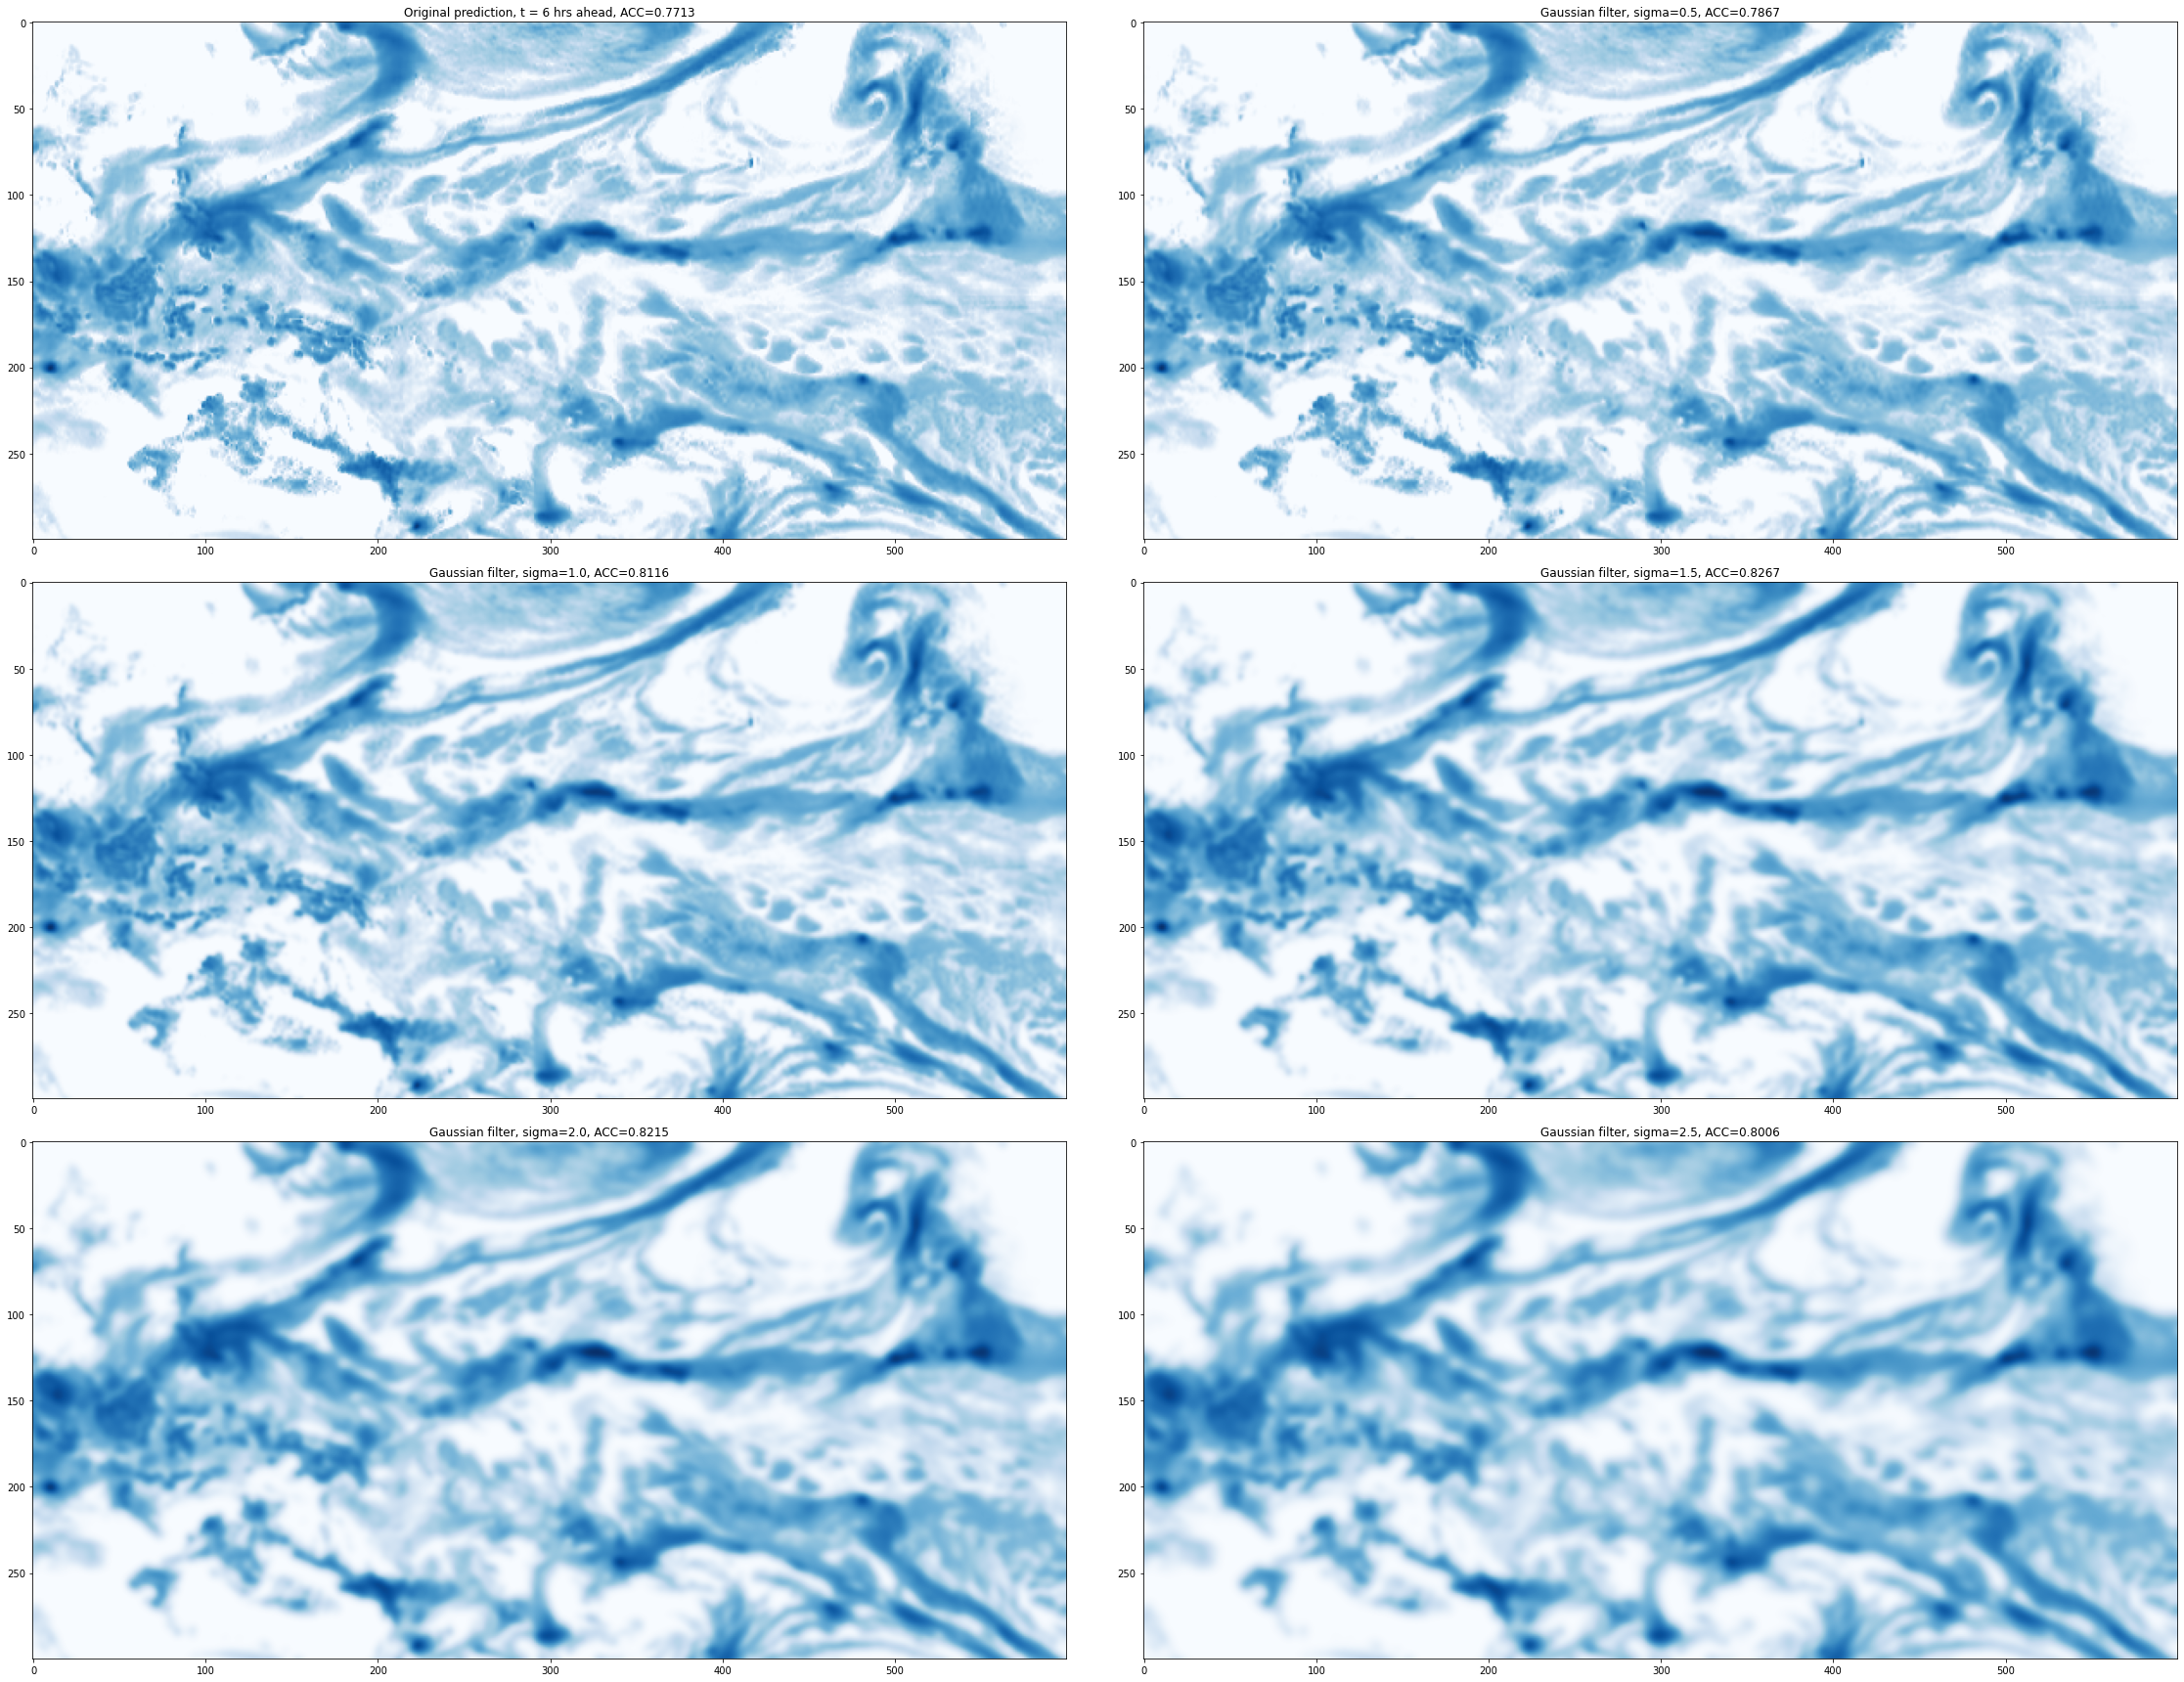

In [78]:
# w = 16
# h = 8

# plt.figure(figsize=(w*2, h*3))

# plt.subplot(3, 2, 1)
# plt.imshow(ic0_hopeful[1].squeeze()[200:500, 400:1000], cmap='Blues')
# plt.title(f'Original prediction, t = 6 hrs ahead, ACC={ic0_hopeful_acc[1]:.4f}')

# for idx, sigma in enumerate([0.5, 1.0, 1.5, 2.0, 2.5]):

#     sig_idx = int((sigma - 0.1) // 0.1)
    
#     plt.subplot(3, 2, idx + 2)
#     plt.imshow(gauss_hopeful['img'][sig_idx][200:500, 400:1000], cmap='Blues')
#     plt.title(f"Gaussian filter, sigma={sigma}, ACC={gauss_hopeful['acc'][sig_idx]:.4f}")

# plt.tight_layout()
# plt.show()


# Plot precip distributions

In [4]:
inf_results['inf_gan_decay']['control']['pred_hists'].shape

(178, 41, 300)

In [ ]:
inf_results['inf_gan_decay']['control']['pred_hists']

In [ ]:


bins = 300
max = 11.
bin_edges = np.linspace(0., max, bins + 1)

f = plt.figure(figsize=(20, 10))

xylims = [((0., 11.), (0.0000001, 0.5)),
          ((0., 4.), (0.075, 0.325)),
          ((4., 6.), (0.04, 0.15)),
          ((6., 11.), (0.0000001, 0.04))]

for i, (xlim, ylim) in enumerate(xylims):
    plt.subplot(2, 2, i+1)
    # era5
    plt.hist(bin_edges[:-1], bin_edges, weights=tar_mean, density=True, histtype='step', log=True,
             color='k', linestyle='--', label='era5')
    plt.hist(bin_edges[:-1], bin_edges, weights=tar_mean - tar_stderr, density=True, histtype='step', log=True,
             color='k', linestyle='--', alpha=0.3)
    plt.hist(bin_edges[:-1], bin_edges, weights=tar_mean + tar_stderr, density=True, histtype='step', log=True,
             color='k', linestyle='--', alpha=0.3)

    # tsit
    plt.hist(bin_edges[:-1], bin_edges, weights=pred_mean, density=True, histtype='step', log=True,
             color='g', linestyle='-', label='tsit')
    plt.hist(bin_edges[:-1], bin_edges, weights=pred_mean - pred_stderr, density=True, histtype='step', log=True,
             color='g', linestyle='-', alpha=0.3)
    plt.hist(bin_edges[:-1], bin_edges, weights=pred_mean + pred_stderr, density=True, histtype='step', log=True,
             color='g', linestyle='-', alpha=0.3)

    if afno is not None:
        afno_mean = precip_hists['afno'].mean(axis=0)
        afno_stderr = precip_hists['afno'].std(axis=0) # / np.sqrt(afno.shape[0])
        plt.hist(bin_edges[:-1], bin_edges, weights=afno_mean, density=True, histtype='step', log=True,
                 color='r', linestyle='-', label='afno')
        plt.hist(bin_edges[:-1], bin_edges, weights=afno_mean - afno_stderr, density=True, histtype='step', log=True,
                 color='r', linestyle='-', alpha=0.3)
        plt.hist(bin_edges[:-1], bin_edges, weights=afno_mean + afno_stderr, density=True, histtype='step', log=True,
                 color='r', linestyle='-', alpha=0.3)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(f'{unlog_tp(xlim[0]):.4f} to {unlog_tp(xlim[1]):.4f} m')
    plt.legend()
    if i in [1, 3]:
        plt.ylabel('log density')
    if i in [3, 4]:
        plt.xlabel('log(1 + TP / 1e-5)')
plt.suptitle(f'mean (+/- std) of per-image TP distribution (n={pred.shape[0]})')
plt.tight_layout()


In [3]:
viz_configs = ['inf_l1_only_afno_wind'] # 'inf_gan_decay', 
inf_viz_results = load_inference_results(*viz_configs, root_dir=inf_dir, viz=True)
inf_viz_results.keys()

OSError: Unable to open file (file signature not found)

In [6]:
inf_viz_results['inf_gan_decay']

{'control': []}

In [ ]:
ic0_hopeful = inf_results['inf_hopeful_sweep_3']['control'][0]['seq_pred_tp'][0]
ic0_real = inf_results['inf_hopeful_sweep_3']['control'][0]['seq_real_tp'][0]
ic0_hopeful_acc = inf_results['inf_hopeful_sweep_3']['control'][0]['acc'][0].squeeze()

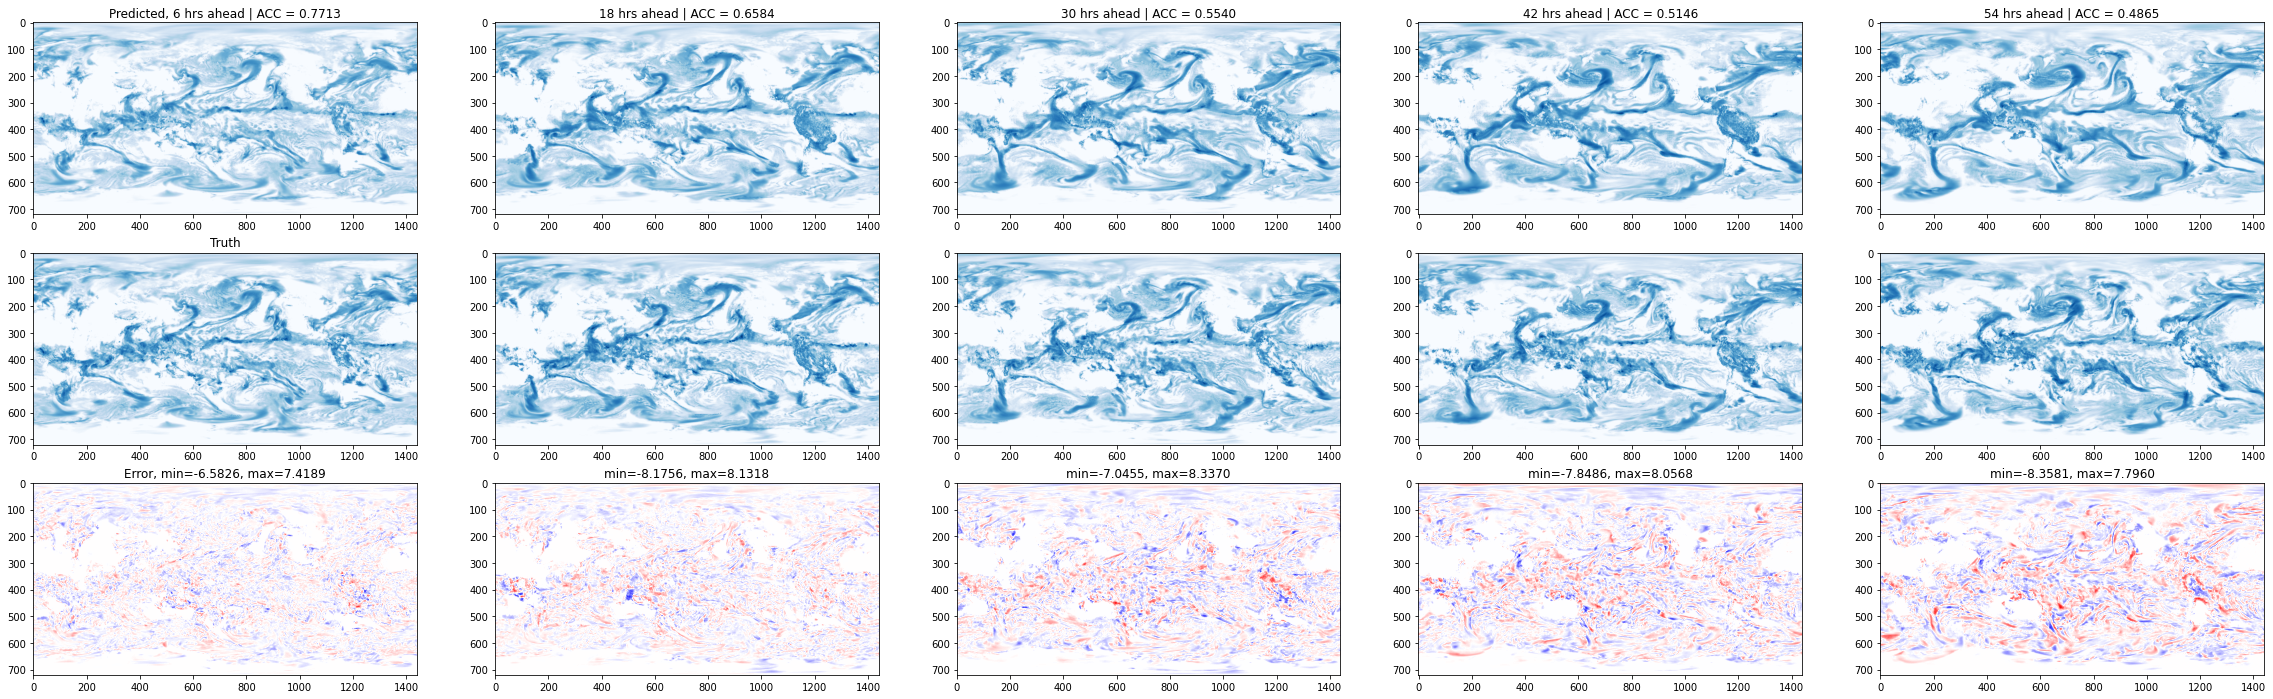

In [110]:
nR = 3
nC = 5
w = 8
h = 4

plt.figure(figsize=(nC*w, nR*h))

for t in range(1, nC*2, 2):
    
    plt_idx = (t // 2) + 1
    R, C = 1, plt_idx % nC

    plt.subplot(nR, nC, plt_idx)
    plt.imshow(ic0_hopeful[t].squeeze(), cmap='Blues')
    if t == 1:
        plt.title(f'Predicted, {t * 6} hrs ahead | ACC = {ic0_hopeful_acc[t]:.4f}')
    else:
        plt.title(f'{t * 6} hrs ahead | ACC = {ic0_hopeful_acc[t]:.4f}')
    
    plt.subplot(nR, nC, plt_idx + nC)
    plt.imshow(ic0_real[t].squeeze(), cmap='Blues')
    if t == 1:
        plt.title(f'Truth')
    
    err = ic0_hopeful[t].squeeze() - ic0_real[t].squeeze()
    
    plt.subplot(nR, nC, plt_idx + nC * 2)
    plt.imshow(err, cmap='bwr', norm=TwoSlopeNorm(0, err.min(), err.max()))
    # plt.colorbar(shrink=0.3, location='bottom', pad=0.1)
    if t == 1:
        plt.title(f'Error, min={err.min():.4f}, max={err.max():.4f}')
    else:
        plt.title(f'min={err.min():.4f}, max={err.max():.4f}')
    
plt.show()